# Fighting California forest fires using spatial analysis

The state of California has a history of wildfires. In this scenario we'll be helping public and private schools prepare and be aware of their risk level.  We'll do this by looking at Los Angeles schools and how many have been within a 1 mile proximity of a wildfire since 2010.  We'll be using the spatial analysis tools available on our GIS. Spatial analysis tools allow overlaying the extent of fire and the locations of the facilities on a map and identifying the ones that fall within the fire's extent.

So in this example we'll show the application of spatial analysis tools such as buffer and overlay.



In [9]:
import datetime
import arcgis
from arcgis.gis import GIS
from IPython.display import display
import pandas as pd


In [23]:
# Set environment settings
arcpy.env.workspace = r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California Wildfires.gdb"

## Visualize the fire data
Let us create a map displaying our area of interest
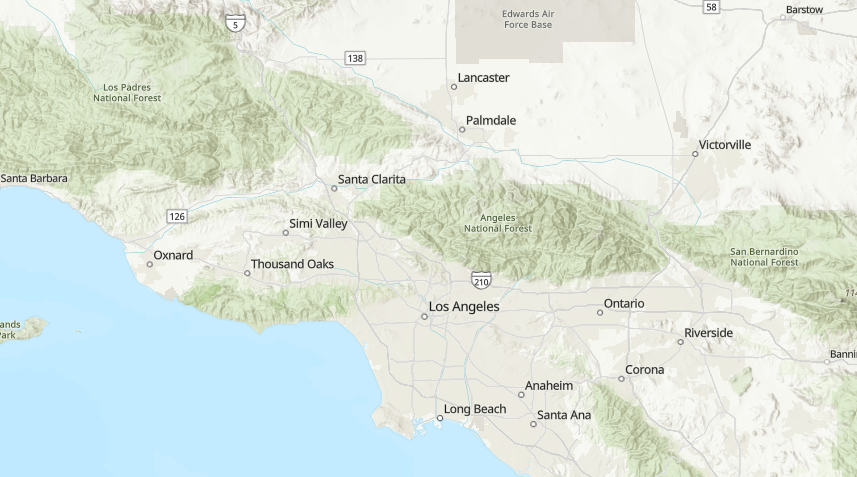

In [29]:
# add the active fires layer
fires = r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\2010-2021LACoFD_Historic_Fire_Perimeters_(Feature_Layer).lyrx"

# Add our layers

In this project, we'll be starting with 3 layers
1)Fires = Historic fire data dating from 2010 to 2021.  The data was taken from a California government website
2)Private schools = This layer was taken from a California government website
2)Public schools = This layer was taken from a California government website

In [30]:
# add our public schools layer
public_schools = r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\SchoolSites1920.lyrx"

In [32]:
# add our private schools layer
private_schools = r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California_Private_Schools.lyrx"

# Buffer Analysis

Now let's use python coding to buffer the fires layer.  We'll essentially be expanding the fires polygon by 1 mile so we can see what schools are within one mile of a fire.


In [52]:
#buffer the fires layer
arcpy.analysis.Buffer("2010-2021LACoFD_Historic_Fire_Perimeters_(Feature_Layer)", r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California Wildifres.gdb\c20102021LACoFD_Historic_Fire", "1 Miles", "FULL", "ROUND", "NONE", None, "GEODESIC")

<Result 'C:\\Users\\1scor\\OneDrive\\Documents\\ArcGIS\\Projects\\California Wildfires\\California Wildifres.gdb\\c20102021LACoFD_Historic_Fire'>

## Display current map with schools and buffered fire layer
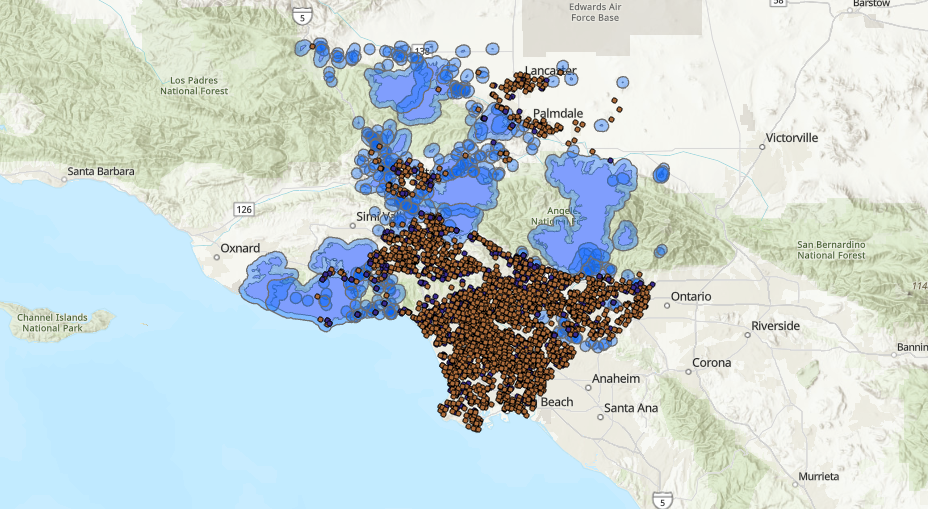

## Perform overlay analysis to find schools that fall within 1 mile of a recent fire

To find the locations that fall within the fire buffers, we use **`overlay_layers`** tool. The `overlay_layers` tool supports a few overlay types, here we use **`Intersect`** as we need to perform a spatial intersection to identify the facilities that are located within the fire boundaries. To learn more about this operation, refer to the [documentation](https://developers.arcgis.com/rest/analysis/api-reference/overlay-layers.htm).

In [54]:
#overlay the private schools with the buffered historic fire layer
arcpy.gapro.OverlayLayers("California_Private_Schools", "c20102021LACoFD_Historic_Fire", r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California Wildifres.gdb\California_Private_Schools_OverlayLayers", "INTERSECT")

<Result 'C:\\Users\\1scor\\OneDrive\\Documents\\ArcGIS\\Projects\\California Wildfires\\California Wildifres.gdb\\California_Private_Schools_OverlayLayers'>

In [55]:
#overlay the public schools with the historic fire layer
arcpy.gapro.OverlayLayers("SchoolSites1920", "2010-2021LACoFD_Historic_Fire_Perimeters_(Feature_Layer)", r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California Wildifres.gdb\Private_Schools_OverlayLayers", "INTERSECT")

<Result 'C:\\Users\\1scor\\OneDrive\\Documents\\ArcGIS\\Projects\\California Wildfires\\California Wildifres.gdb\\Private_Schools_OverlayLayers'>

## Display schools that are within 1 mile of fires
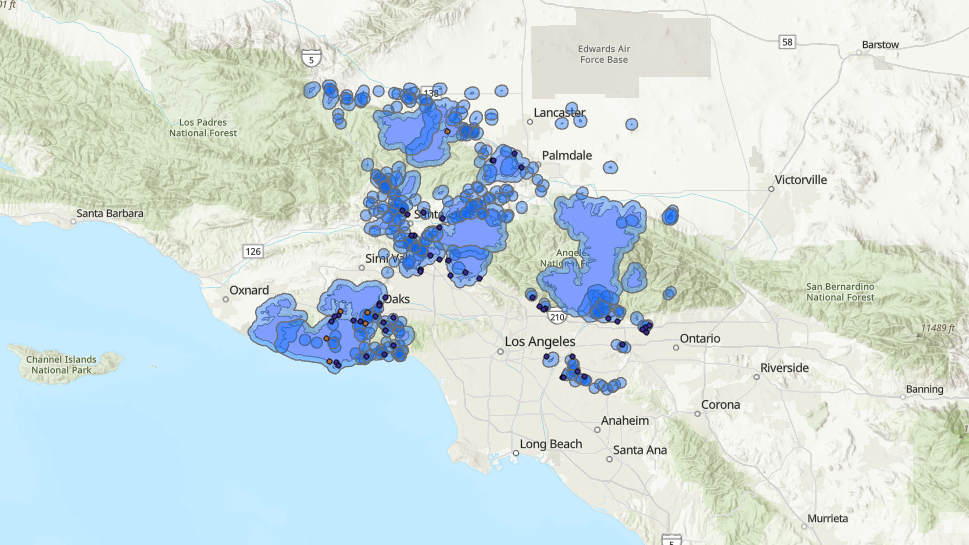

The output of the overlay analysis is a Feature Layer Item. We can access the layers and tables in an Item represing GIS services using the `layers` and `tables` attributes. 

## Read analysis results 


Let's display all of the private school names that have been at risk.  We'll be using the SearchCursor method.  This grabs the field we're looking for and displays the whole column from the attribute table.



In [83]:
#define at risk private schools' names and year of the fire and display attribute table
at_risk_private_schools  = r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\Private_Schools_OverlayLayers.lyrx"
fields = ['SchoolName', 'year']

with arcpy.da.SearchCursor(at_risk_private_schools,fields) as cursor:
    for row in cursor:
        print (row)

('Hughes-Elizabeth Lakes', '2019-20')
('Yerba Buena Elementary', '2019-20')
('Lupin Hill Elementary', '2019-20')
('Arthur E. Wright Middle', '2019-20')
('Road to Success Academy at Campus Kilpatrick', '2019-20')
('Malibu High', '2019-20')
('Malibu Middle', '2019-20')


In [82]:
#define at risk public schools' names and year of the fire and display attribute table
at_risk_public_schools  = r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California_Public_Schools_OverlayLayers.lyrx"
fields = ['School', 'Year']

with arcpy.da.SearchCursor(at_risk_public_schools,fields) as cursor:
    for row in cursor:
        print (row)

('Born Learners School', 2018)
('Molokan Elementary School', 2019)
('Heather Ridge Association Academy', 2017)
('Molokan Elementary School', 2019)
("St. Mark's Lutheran Elementary", 2020)
('Mesivta of Greater Los Angeles', 2019)
('McKinna Learning Center', 2018)
('Our Lady of Malibu', 2018)
('Viewpoint School', 2016)
('Heather Ridge Association Academy', 2016)
('Mesivta of Greater Los Angeles', 2014)
('Guardian Angel Elementary', 2017)
('Five Live Oaks', 2017)
('Montessori of Santa Clarita', 2014)
('Creative Corners', 2016)
('Saint Jude the Apostle', 2016)
('Trinity Classical Academy', 2016)
('Oak Knoll Montessori School', 2021)
('Trinity Classical Academy', 2021)
('Oak Knoll Montessori School', 2019)
('Our Lady of Malibu', 2020)
('Stratford School', 2017)
('Lutheran High School La Verne', 2013)
('High Point Academy', 2019)
("Roger's Creek Academy", 2010)
('Sycamore School', 2018)
('Sycamore School', 2020)
('Hope Lutheran Elementary', 2014)
('Don Bosco Technical Institute', 2015)
('Lif

Let us export a CSV with only the facility name and other critical details. This CSV can be considered as a valuable information product as a result of this analysis and can be shared with the teams assisting in organizing the firefighting efforts, evacuations, etc.

In [86]:
#print the overlap layers as a csv to share with those who need it
arcpy.conversion.TableToTable("Private_Schools_OverlayLayers", r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California Wildifres.gdb", "Private_Schools_Overlays", "SchoolName IS NOT NULL And Year IS NOT NULL", 'FID "FID" true true false 4 Long 0 0,First,#,Private_Schools_OverlayLayers,FID,-1,-1;OBJECTID "OBJECTID" true true false 4 Long 0 0,First,#,Private_Schools_OverlayLayers,OBJECTID,-1,-1;Year "Year" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Year,0,10485758;FedID "FedID" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,FedID,0,10485758;CDSCode "CDSCode" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,CDSCode,0,10485758;CDCode "CDCode" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,CDCode,0,10485758;SCode "SCode" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,SCode,0,10485758;CountyName "CountyName" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,CountyName,0,10485758;DistrictNa "DistrictNa" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,DistrictNa,0,10485758;SchoolName "SchoolName" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,SchoolName,0,10485758;SchoolType "SchoolType" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,SchoolType,0,10485758;Status "Status" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Status,0,10485758;OpenDate "OpenDate" true true false 8 Date 0 0,First,#,Private_Schools_OverlayLayers,OpenDate,-1,-1;ClosedDate "ClosedDate" true true false 8 Date 0 0,First,#,Private_Schools_OverlayLayers,ClosedDate,-1,-1;SchoolLeve "SchoolLeve" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,SchoolLeve,0,10485758;GradeLow "GradeLow" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,GradeLow,0,10485758;GradeHigh "GradeHigh" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,GradeHigh,0,10485758;Charter "Charter" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Charter,0,10485758;CharterNum "CharterNum" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,CharterNum,0,10485758;FundingTyp "FundingTyp" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,FundingTyp,0,10485758;Virtual "Virtual" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Virtual,0,10485758;Magnet "Magnet" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Magnet,0,10485758;TitleIStat "TitleIStat" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,TitleIStat,0,10485758;DASS "DASS" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,DASS,0,10485758;AssistStat "AssistStat" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,AssistStat,0,10485758;Street "Street" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Street,0,10485758;City "City" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,City,0,10485758;Zip "Zip" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Zip,0,10485758;State "State" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,State,0,10485758;CongUS "CongUS" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,CongUS,0,10485758;SenateCA "SenateCA" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,SenateCA,0,10485758;AssemblyCA "AssemblyCA" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,AssemblyCA,0,10485758;Locale "Locale" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,Locale,0,10485758;Latitude "Latitude" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,Latitude,-1,-1;Longitude "Longitude" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,Longitude,-1,-1;LocSource "LocSource" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,LocSource,0,10485758;EnrollTota "EnrollTota" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,EnrollTota,-1,-1;AAcount "AAcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,AAcount,-1,-1;AApct "AApct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,AApct,-1,-1;AIcount "AIcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,AIcount,-1,-1;AIpct "AIpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,AIpct,-1,-1;AScount "AScount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,AScount,-1,-1;ASpct "ASpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,ASpct,-1,-1;FIcount "FIcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,FIcount,-1,-1;FIpct "FIpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,FIpct,-1,-1;HIcount "HIcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,HIcount,-1,-1;HIpct "HIpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,HIpct,-1,-1;PIcount "PIcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,PIcount,-1,-1;PIpct "PIpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,PIpct,-1,-1;WHcount "WHcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,WHcount,-1,-1;WHpct "WHpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,WHpct,-1,-1;MRcount "MRcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,MRcount,-1,-1;MRpct "MRpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,MRpct,-1,-1;NRcount "NRcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,NRcount,-1,-1;NRpct "NRpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,NRpct,-1,-1;ELcount "ELcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,ELcount,-1,-1;ELpct "ELpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,ELpct,-1,-1;FOScount "FOScount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,FOScount,-1,-1;FOSpct "FOSpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,FOSpct,-1,-1;HOMcount "HOMcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,HOMcount,-1,-1;HOMpct "HOMpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,HOMpct,-1,-1;MIGcount "MIGcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,MIGcount,-1,-1;MIGpct "MIGpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,MIGpct,-1,-1;SEDCount "SEDCount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,SEDCount,-1,-1;SEDpct "SEDpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,SEDpct,-1,-1;SWDcount "SWDcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,SWDcount,-1,-1;SWDpct "SWDpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,SWDpct,-1,-1;FRPMcount "FRPMcount" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,FRPMcount,-1,-1;FRPMpct "FRPMpct" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,FRPMpct,-1,-1;FID_overlay "FID_overlay" true true false 4 Long 0 0,First,#,Private_Schools_OverlayLayers,FID_overlay,-1,-1;OBJECTID_1 "OBJECTID_1" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,OBJECTID_1,-1,-1;OBJECTID_overlay "OBJECTID_overlay" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,OBJECTID_overlay,-1,-1;YEAR_overlay "YEAR_overlay" true true false 2 Short 0 0,First,#,Private_Schools_OverlayLayers,YEAR_overlay,-1,-1;FIRE_NAME "FIRE_NAME" true true false 10485758 Text 0 0,First,#,Private_Schools_OverlayLayers,FIRE_NAME,0,10485758;GIS_ACRES "GIS_ACRES" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,GIS_ACRES,-1,-1;Shape_Leng "Shape_Leng" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,Shape_Leng,-1,-1;Shape__Are "Shape__Are" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,Shape__Are,-1,-1;Shape__Len "Shape__Len" true true false 8 Double 0 0,First,#,Private_Schools_OverlayLayers,Shape__Len,-1,-1', '')
arcpy.conversion.TableToTable("California_Public_Schools_OverlayLayers", r"C:\Users\1scor\OneDrive\Documents\ArcGIS\Projects\California Wildfires\California Wildifres.gdb", "California_Public_Schools_Overlay_table", "School IS NOT NULL And YEAR IS NOT NULL", 'FID "FID" true true false 4 Long 0 0,First,#,California_Public_Schools_OverlayLayers,FID,-1,-1;ObjectID "ObjectID" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,ObjectID,-1,-1;Loc_name "Loc_name" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Loc_name,0,10485758;Status "Status" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Status,0,10485758;Score "Score" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,Score,-1,-1;Match_type "Match_type" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Match_type,0,10485758;Match_addr "Match_addr" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Match_addr,0,10485758;User_fld "User_fld" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,User_fld,0,10485758;Addr_type "Addr_type" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Addr_type,0,10485758;Side "Side" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Side,0,10485758;ARC_Street "ARC_Street" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,ARC_Street,0,10485758;ARC_City "ARC_City" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,ARC_City,0,10485758;ARC_State "ARC_State" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,ARC_State,0,10485758;ARC_ZIP "ARC_ZIP" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,ARC_ZIP,0,10485758;AffidavitI "AffidavitI" true true false 4 Long 0 0,First,#,California_Public_Schools_OverlayLayers,AffidavitI,-1,-1;County "County" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,County,0,10485758;CDSCode "CDSCode" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,CDSCode,0,10485758;School "School" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,School,0,10485758;Street "Street" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Street,0,10485758;City "City" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,City,0,10485758;State "State" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,State,0,10485758;Zip "Zip" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Zip,0,10485758;MailingStr "MailingStr" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,MailingStr,0,10485758;MailingCit "MailingCit" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,MailingCit,0,10485758;MailingSta "MailingSta" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,MailingSta,0,10485758;MailingZip "MailingZip" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,MailingZip,0,10485758;Telephone "Telephone" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Telephone,0,10485758;Email "Email" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Email,0,10485758;Email2 "Email2" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Email2,0,10485758;PublicDist "PublicDist" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,PublicDist,0,10485758;SiteAdmini "SiteAdmini" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,SiteAdmini,0,10485758;SiteAdmi_1 "SiteAdmi_1" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,SiteAdmi_1,0,10485758;SiteAdmi_2 "SiteAdmi_2" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,SiteAdmi_2,0,10485758;SiteAdmi_3 "SiteAdmi_3" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,SiteAdmi_3,0,10485758;SiteAdmi_4 "SiteAdmi_4" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,SiteAdmi_4,0,10485758;SchoolType "SchoolType" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,SchoolType,0,10485758;SchoolAcco "SchoolAcco" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,SchoolAcco,0,10485758;LowGrade "LowGrade" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,LowGrade,0,10485758;HighGrade "HighGrade" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,HighGrade,0,10485758;Kindergart "Kindergart" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Kindergart,-1,-1;Grade1Enro "Grade1Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade1Enro,-1,-1;Grade2Enro "Grade2Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade2Enro,-1,-1;Grade3Enro "Grade3Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade3Enro,-1,-1;Grade4Enro "Grade4Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade4Enro,-1,-1;Grade5Enro "Grade5Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade5Enro,-1,-1;Grade6Enro "Grade6Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade6Enro,-1,-1;Grade7Enro "Grade7Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade7Enro,-1,-1;Grade8Enro "Grade8Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade8Enro,-1,-1;Grade9Enro "Grade9Enro" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade9Enro,-1,-1;Grade10Enr "Grade10Enr" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade10Enr,-1,-1;Grade11Enr "Grade11Enr" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade11Enr,-1,-1;Grade12Enr "Grade12Enr" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Grade12Enr,-1,-1;UngradedEl "UngradedEl" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,UngradedEl,-1,-1;UngradedSe "UngradedSe" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,UngradedSe,-1,-1;TotalEnrol "TotalEnrol" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,TotalEnrol,-1,-1;DiplomaOff "DiplomaOff" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,DiplomaOff,0,10485758;Graduates2 "Graduates2" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,Graduates2,-1,-1;FullTimeTe "FullTimeTe" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,FullTimeTe,-1,-1;PartTimeTe "PartTimeTe" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,PartTimeTe,-1,-1;Administra "Administra" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,Administra,-1,-1;OtherStaff "OtherStaff" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,OtherStaff,-1,-1;OffersSpec "OffersSpec" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,OffersSpec,0,10485758;TaxExempt5 "TaxExempt5" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,TaxExempt5,0,10485758;TaxExempt2 "TaxExempt2" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,TaxExempt2,0,10485758;TaxExemp_1 "TaxExemp_1" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,TaxExemp_1,0,10485758;TaxExempt "TaxExempt" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,TaxExempt,0,10485758;ReligiousC "ReligiousC" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,ReligiousC,0,10485758;ReligiousD "ReligiousD" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,ReligiousD,0,10485758;Director_P "Director_P" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Director_P,0,10485758;Director_1 "Director_1" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Director_1,0,10485758;Director_2 "Director_2" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Director_2,0,10485758;Director_3 "Director_3" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Director_3,0,10485758;Director_4 "Director_4" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Director_4,0,10485758;Custodiano "Custodiano" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Custodiano,0,10485758;Custodia_1 "Custodia_1" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Custodia_1,0,10485758;Custodia_2 "Custodia_2" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Custodia_2,0,10485758;Custodia_3 "Custodia_3" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,Custodia_3,0,10485758;OBJECTID_12 "OBJECTID_12" true false false 4 Long 0 0,First,#,California_Public_Schools_OverlayLayers,OBJECTID_12,-1,-1;OBJECTID_1 "OBJECTID_1" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,OBJECTID_1,-1,-1;OBJECTID_overlay "OBJECTID_overlay" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,OBJECTID_overlay,-1,-1;YEAR "YEAR" true true false 2 Short 0 0,First,#,California_Public_Schools_OverlayLayers,YEAR,-1,-1;FIRE_NAME "FIRE_NAME" true true false 10485758 Text 0 0,First,#,California_Public_Schools_OverlayLayers,FIRE_NAME,0,10485758;GIS_ACRES "GIS_ACRES" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,GIS_ACRES,-1,-1;Shape_Leng "Shape_Leng" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,Shape_Leng,-1,-1;Shape__Are "Shape__Are" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,Shape__Are,-1,-1;Shape__Len "Shape__Len" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,Shape__Len,-1,-1;BUFF_DIST "BUFF_DIST" true true false 8 Double 0 0,First,#,California_Public_Schools_OverlayLayers,BUFF_DIST,-1,-1;ORIG_FID "ORIG_FID" true true false 4 Long 0 0,First,#,California_Public_Schools_OverlayLayers,ORIG_FID,-1,-1', '')

<Result 'C:\\Users\\1scor\\OneDrive\\Documents\\ArcGIS\\Projects\\California Wildfires\\California Wildifres.gdb\\California_Public_Schools_Overlay_table'>

## Use the results to create a conclusion

Using the above analysis, we can create a few conclusions. 
1)Schools located near a body of water are actually in more danger.  The reason being the bodies of water in Los Angeles (besides the ocean) are all near national parks, hills, forests etc.  Examples being Santa Monica mountains and San Gabriel Canyon for example surround a body of water but have had various wildfires
2)As a percentage, public schools are more at risk than private schools
Private schools = 7 out of 898 have been within 1 mile of a fire = 0.7%
Public schools = 82 out of 2203 have been within 1 mile of a fire = 3%